## Concentration gradients near downstream side of canyon head

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns



In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

#lib_path = os.path.abspath('/Users/anakarinarm/SubmarineCanyonsResearch/PythonModulesMITgcm') # Add absolute path to my python scripts

#sys.path.append(lib_path)

#import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [70]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

Ptracer='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
PtracerOut = Dataset(Ptracer)

Ptracer3D='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'
Ptracer3DOut = Dataset(Ptracer3D)

PtracerNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'
PtracerNoCOut = Dataset(PtracerNoC)


In [5]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

z = CanyonStateOut.variables['Z']



In [6]:
Tr1 = rout.getField(Ptracer,'Tr1') # 
Tr3 = rout.getField(Ptracer,'Tr3')

In [27]:
MaskExp = np.expand_dims(MaskC,0)

MaskTr = MaskExp + np.zeros(Tr1.shape)

Tr1Masked = np.ma.masked_array(Tr1,mask = MaskTr) 
Tr3Masked = np.ma.masked_array(Tr3,mask = MaskTr) 



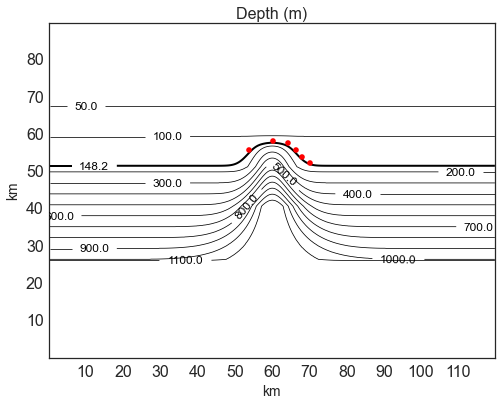

In [83]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig = plt.figure(figsize=(8,6))

lev = range(200,1200,100)

levels = [50,100,148.17]+lev
CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,2,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)

plt.plot(xc[262,180],yc[262,180],'ro',
         xc[259,210],yc[259,210],'ro',
         xc[250,223],yc[250,223],'ro',
         xc[240,232],yc[240,232],'ro',
         xc[231,242],yc[231,242],'ro',
         xc[250,137],yc[250,137],'ro')
    
plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)



The red dots on the figure correspond to the stations where I will look at vertical concentration profiles. Stations named A-E from centre to right. The station on the left side (upstream) is called 'Up' and it is there for comparison.

In [84]:
#station indices

ys = [250,262,259,250,240,231]
xs = [137,180,210,223,232,242]
Station = ['Up','A','B','C','D','E']

In [91]:
def PlotProfiles(Tr,palette,Trname,Station,ys,xs):
    
    sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)

    times = [2,4,6,8,10]


    with sns.color_palette(palette,7):
        fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2, 5, figsize=(25, 12))

        for ii in range(len(Station)):
      
            ax1.plot(Tr[0,:,ys[ii],xs[ii]],z[:],label = Station[ii])
            ax1.set_title(' %s Day 0 ' %Trname)
            ax1.set_ylabel('Depth (m)')
            ax1.legend(loc=0)
     
            ax2.plot(Tr[2,:,ys[ii],xs[ii]],z[:])
            ax2.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax2.set_title(' Day 1 ')
            
            ax3.plot(Tr[4,:,ys[ii],xs[ii]],z[:])
            ax3.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax3.set_title(' Day 2 ')
            
            ax4.plot(Tr[6,:,ys[ii],xs[ii]],z[:])
            ax4.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax4.set_title(' Day 3 ')
            
            ax5.plot(Tr[8,:,ys[ii],xs[ii]],z[:])
            ax5.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax5.set_title(' Day 4 ')
            
            ax6.plot(Tr[10,:,ys[ii],xs[ii]],z[:])
            ax6.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax6.set_title(' Day 5 ')
            ax6.set_xlabel('Concentration (mol/l)')
     
            ax7.plot(Tr[12,:,ys[ii],xs[ii]],z[:])
            ax7.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax7.set_title(' Day 6 ')
            ax7.set_xlabel('Concentration (mol/l)')
        
            ax8.plot(Tr[14,:,ys[ii],xs[ii]],z[:])
            ax8.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax8.set_title(' Day 7 ')
            ax8.set_xlabel('Concentration (mol/l)')
        
            ax9.plot(Tr[16,:,ys[ii],xs[ii]],z[:])
            ax9.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax9.set_title(' Day 8 ')
            ax9.set_xlabel('Concentration (mol/l)')
     
            ax10.plot(Tr[18,:,ys[ii],xs[ii]],z[:])
            ax10.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax10.set_title(' Day 9 ')
            ax10.set_xlabel('Concentration (mol/l)')
     
     
     
    plt.show()

    #fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

### Tracer 1

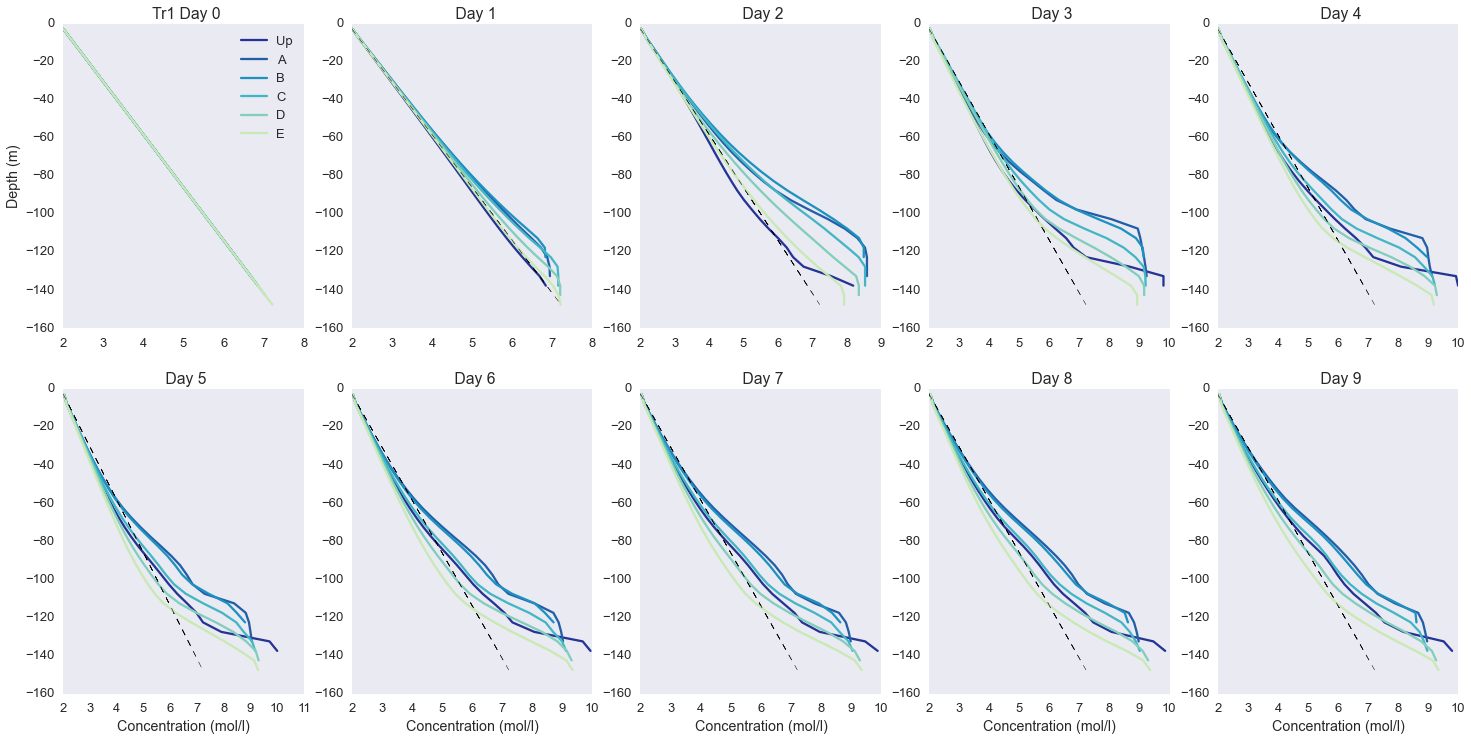

In [92]:
PlotProfiles(Tr1Masked,'YlGnBu_r','Tr1',Station,ys,xs)

### Tracer 3 

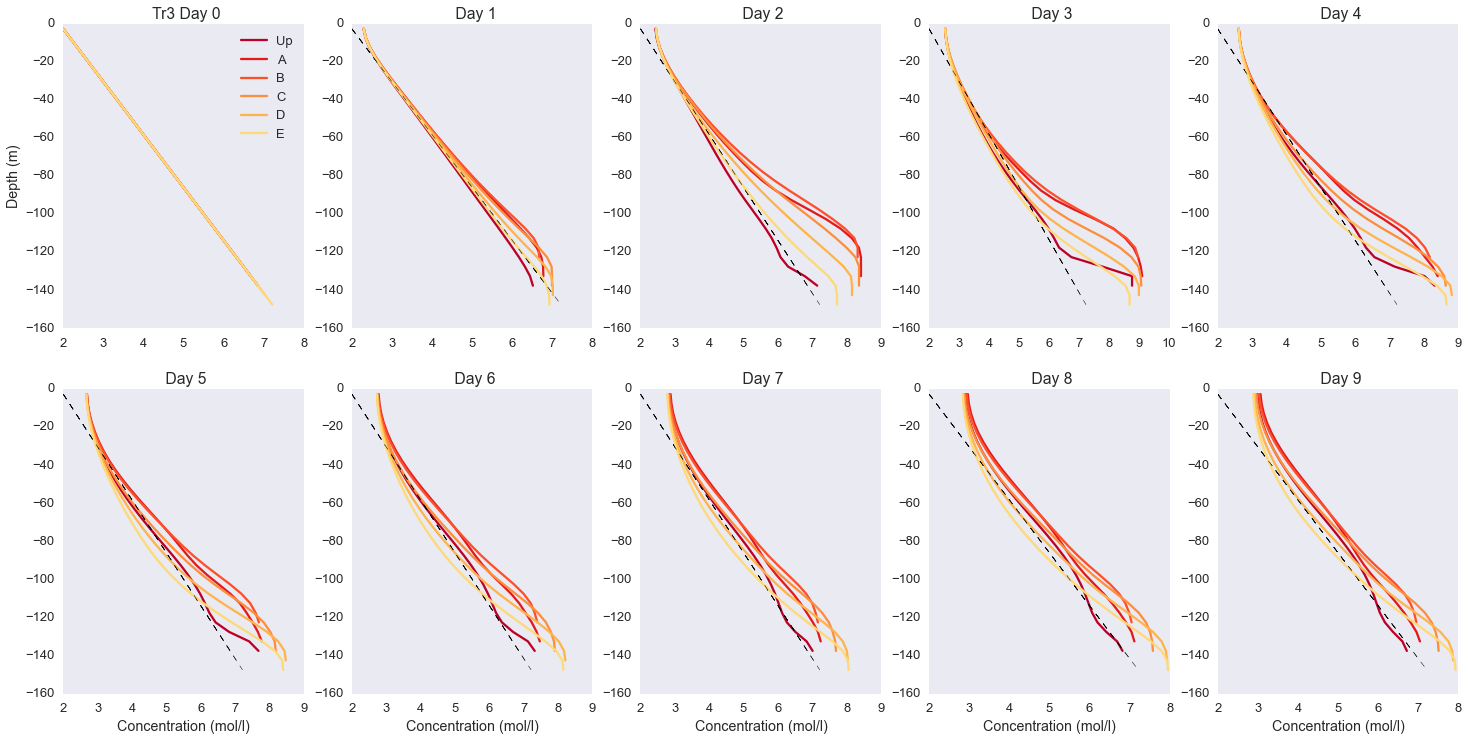

In [93]:
PlotProfiles(Tr3Masked,'YlOrRd_r','Tr3',Station,ys,xs)

### 3D DIFF with K_v_in = 1E-3, K_v_out=1E-5

In [94]:
Tr13D = rout.getField(Ptracer3D,'Tr1') # 

Tr1Masked3D = np.ma.masked_array(Tr13D,mask = MaskTr) 


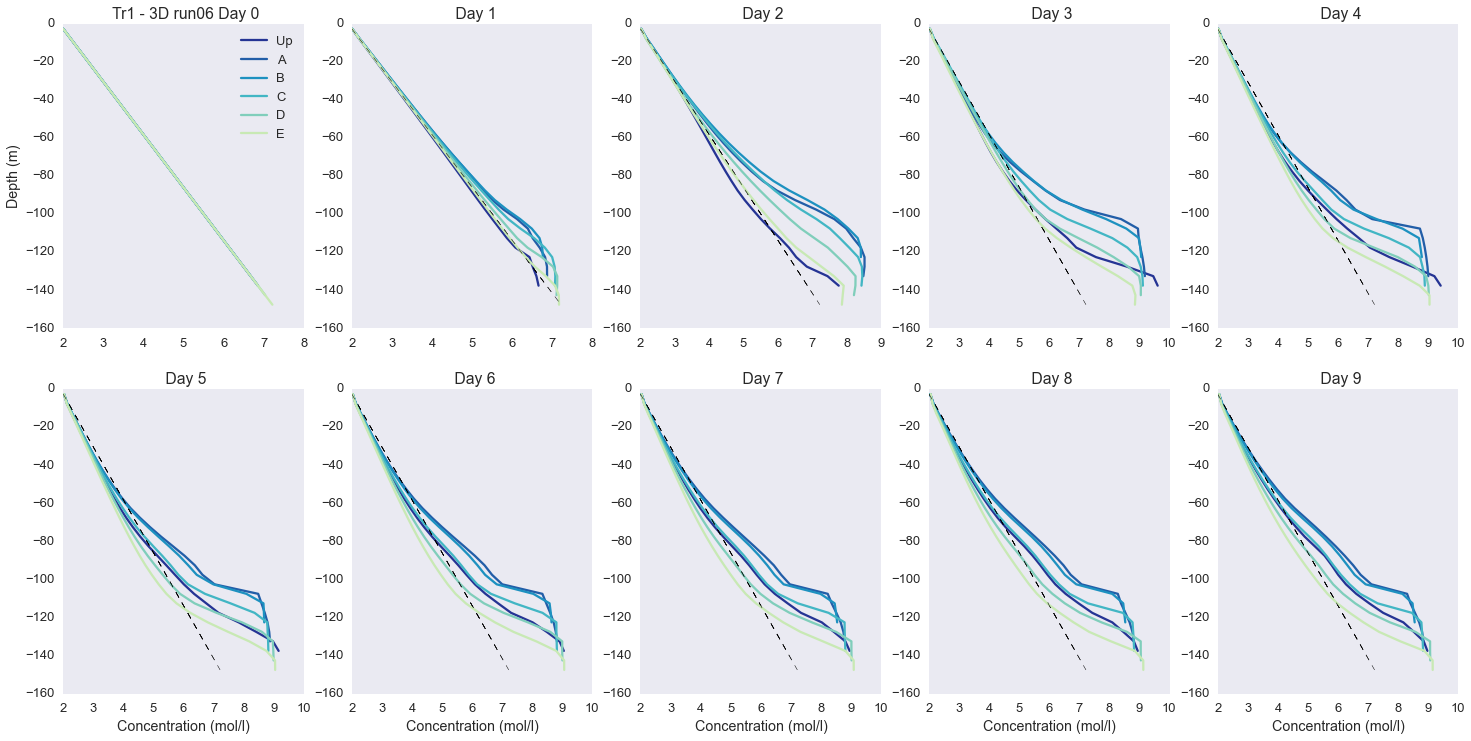

In [95]:
PlotProfiles(Tr1Masked3D,'YlGnBu_r','Tr1 - 3D run06',Station,ys,xs)

### Difference between constant diffusivity and 3D diffusivity. 
For 3D case, Kv outside the canyon matches Kv for the CNT run (1E-5). Within, it is the same as Tr3 (1E-3)

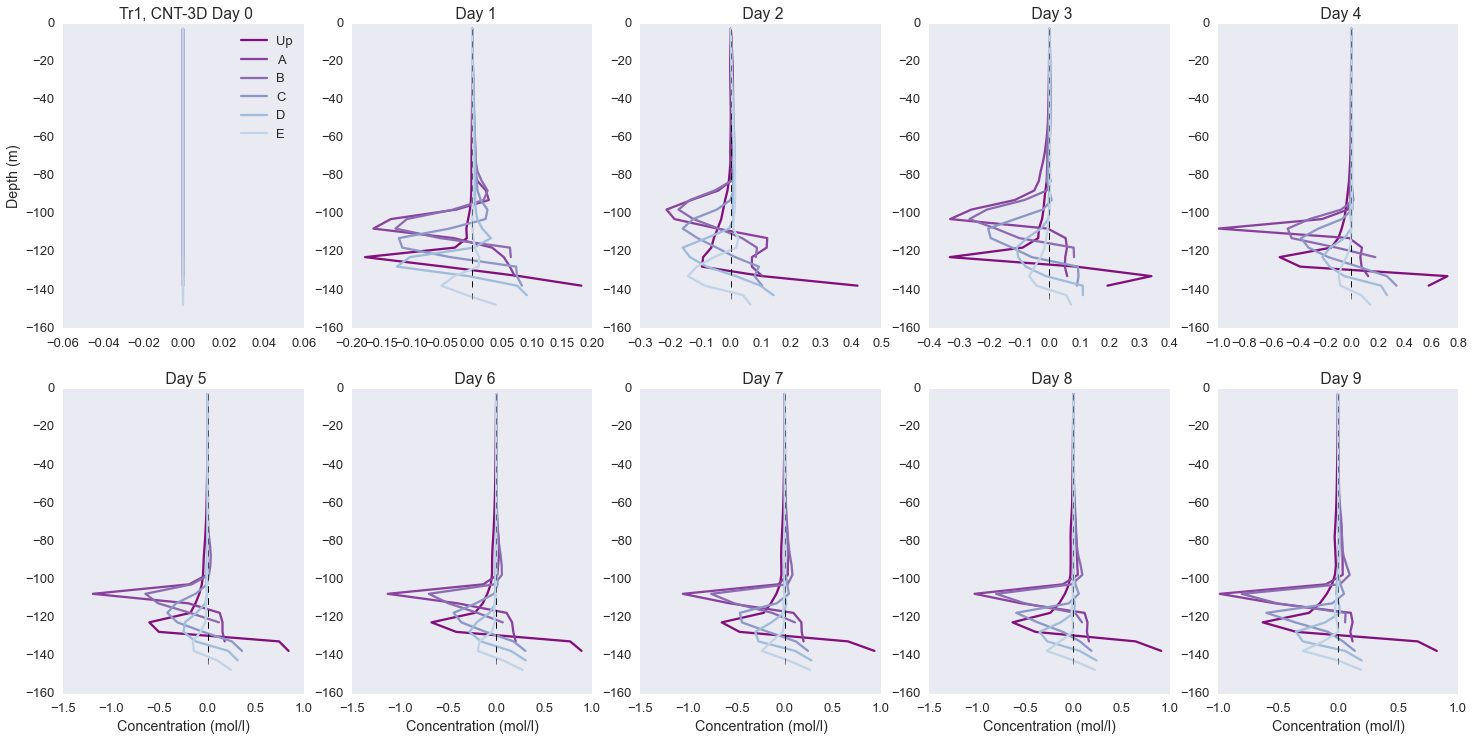

In [96]:
PlotProfiles(Tr1Masked-Tr1Masked3D,'BuPu_r','Tr1, CNT-3D',Station,ys,xs)

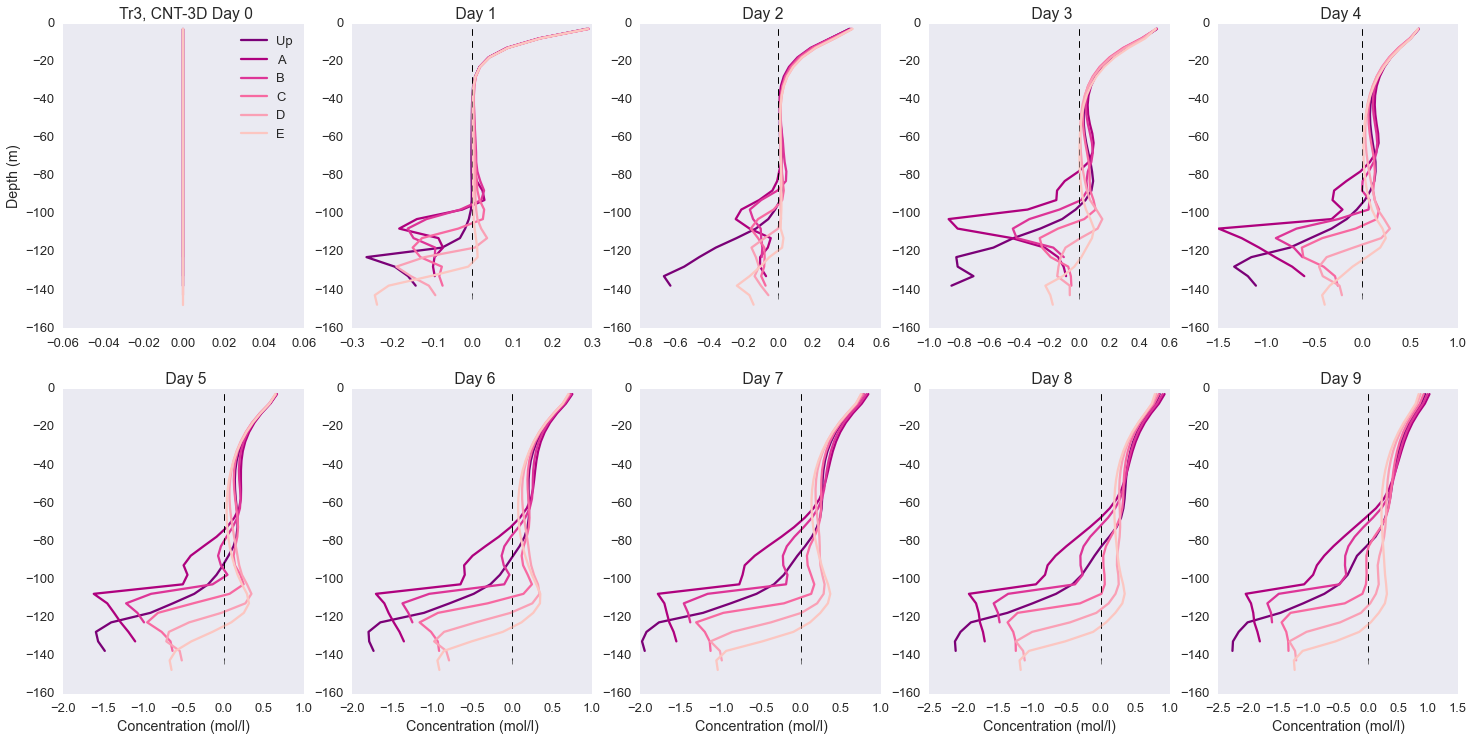

In [97]:
PlotProfiles(Tr3Masked-Tr1Masked3D,'RdPu_r','Tr3, CNT-3D',Station,ys,xs)

### No canyon 

In [98]:
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')

Tr1NoC = rout.getField(PtracerNoC,'Tr1') # 
Tr3NoC = rout.getField(PtracerNoC,'Tr3')

MaskExpNoC = np.expand_dims(MaskCNoC,0)

MaskTrNoC = MaskExpNoC + np.zeros(Tr1NoC.shape)

Tr1MaskedNoC = np.ma.masked_array(Tr1NoC,mask = MaskTrNoC) 
Tr3MaskedNoC = np.ma.masked_array(Tr3NoC,mask = MaskTrNoC) 


In [100]:
#station indices

ysnoc = [227,227,227,227,227,227]
xsnoc = [137,180,210,223,232,242]
Station = ['Up','A','B','C','D','E']

### Tr1 , no canyon

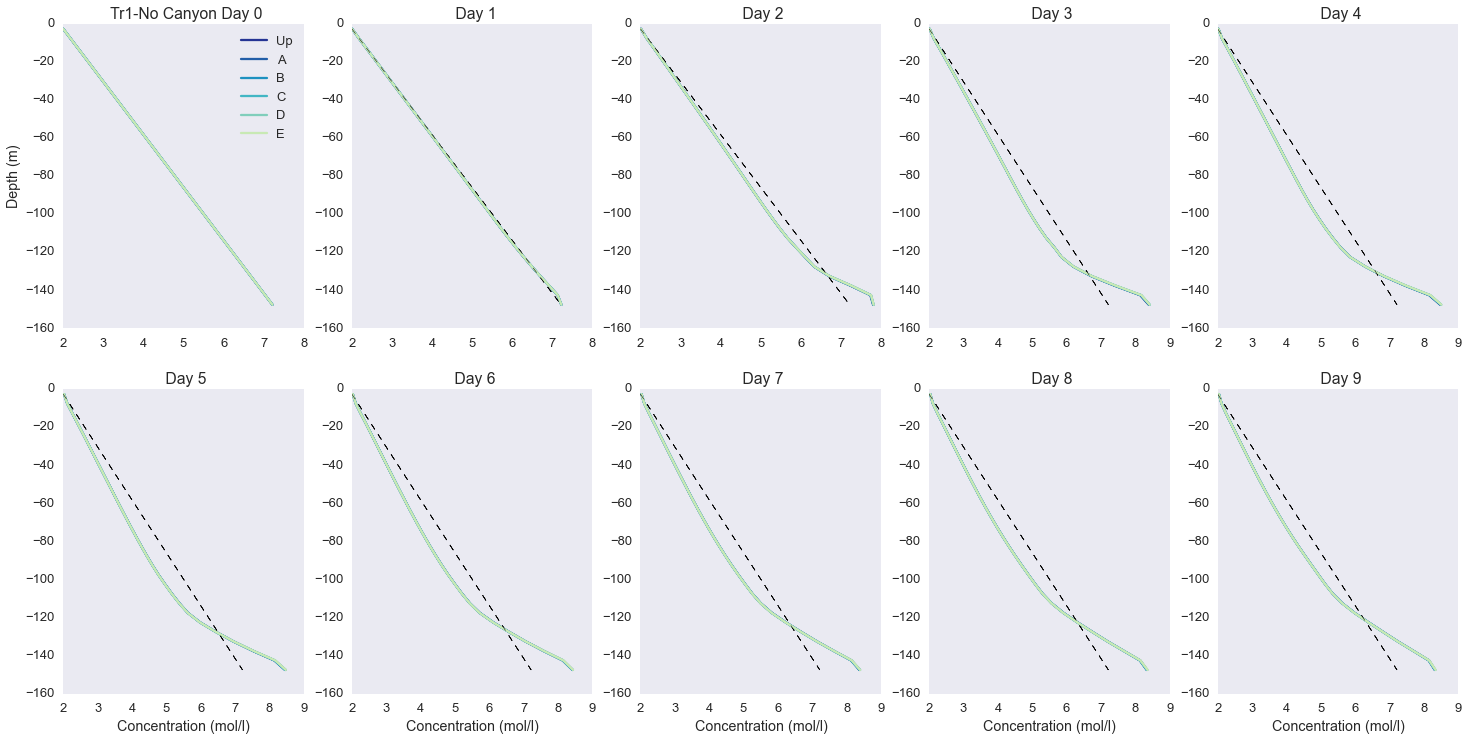

In [101]:
PlotProfiles(Tr1MaskedNoC,'YlGnBu_r','Tr1-No Canyon',Station,ysnoc,xsnoc)

### Tr3, no canyon

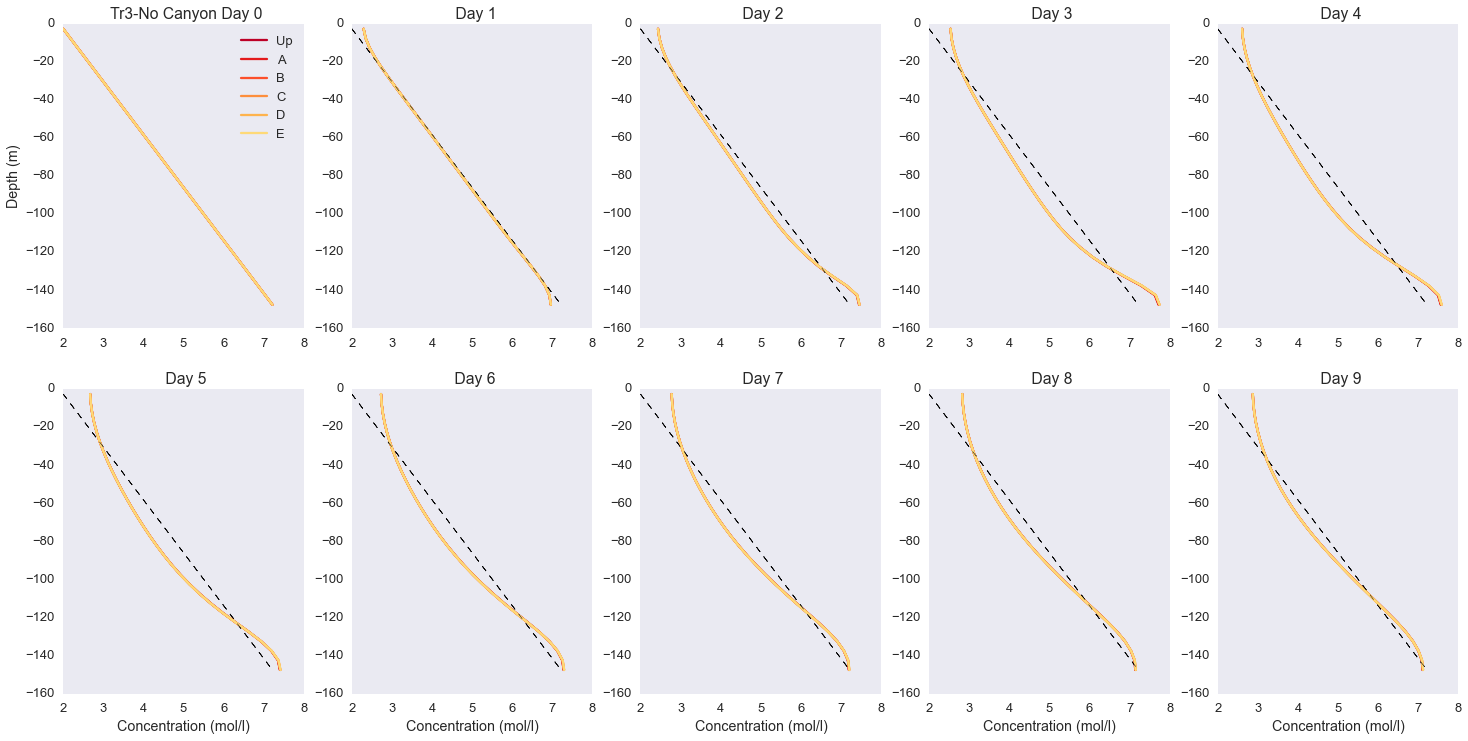

In [102]:
PlotProfiles(Tr3MaskedNoC,'YlOrRd_r','Tr3-No Canyon',Station,ysnoc,xsnoc)